In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pycomlink as pycml
from pycomlink.core import ComlinkChannel

f =  16

t_date_range = pd.date_range(start='2015-01-01', periods=200, freq='min')
t_list = [str(date) for date in t_date_range]
rx_list = list(np.sin(np.linspace(0, 10, len(t_list))))
tx_list = list(np.cos(np.linspace(0, 10, len(t_list))))

df = pd.DataFrame(index=t_date_range, data={'rx': rx_list})
cml_ch_1min = ComlinkChannel(data=df, f_GHz=f)
cml_ch_5min = ComlinkChannel(data=df.resample('5min').apply(np.mean), f_GHz=f)

In [9]:
from pycomlink.core import Comlink

In [10]:
site_dict = {'site_a_latitude': 48.1,
             'site_a_longitude': 11.1,
             'site_b_latitude': 48.2,
             'site_b_longitude': 11.0}

cml = Comlink(channels=[cml_ch_1min, cml_ch_1min], cml_id='F00Bar', **site_dict)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ecdbd50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11ed91950>], dtype=object)

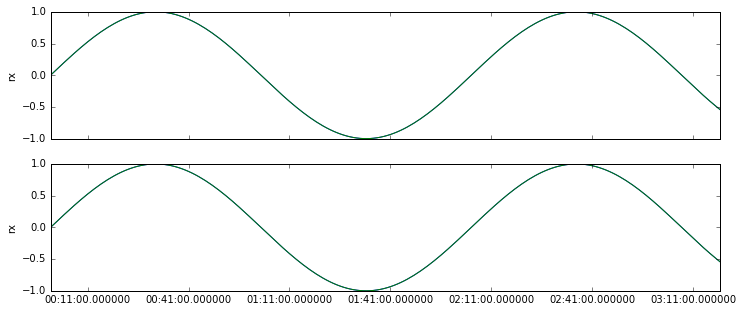

In [42]:
cml.plot_data(['rx', 'rx'])

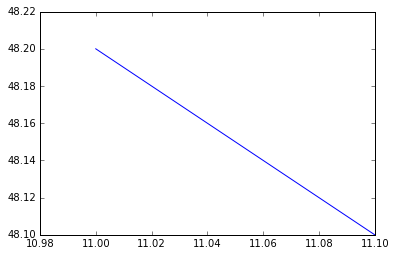

In [12]:
cml.plot_line()

In [7]:
cml.plot_map()

In [10]:
cml

,rx
2015-01-01 00:00:00,0.000000
2015-01-01 00:01:00,0.050230
2015-01-01 00:02:00,0.100333
2015-01-01 00:03:00,0.150183
2015-01-01 00:04:00,0.199654
2015-01-01 00:05:00,0.248621
2015-01-01 00:06:00,0.296960
2015-01-01 00:07:00,0.344549
2015-01-01 00:08:00,0.391269
2015-01-01 00:09:00,0.437001


In [21]:
cml = pycml.wet_dry.std_dev.std_dev_classification(cml, window_length=10, threshold=0.11)

Could not find TRSL in channel. Using TX-RX or only RX.
Could not find TRSL in channel. Using TX-RX or only RX.


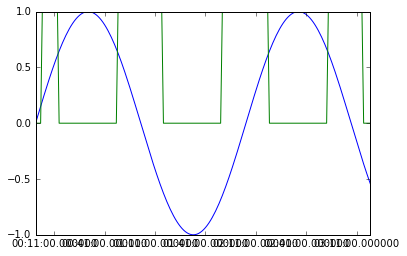

In [23]:
plt.plot(cml.channel_1)

In [29]:
ts_wet, roll_std_dev = pycml.wet_dry.std_dev.std_dev_classification(cml.channel_1, window_length=10, threshold=0.11)

Could not find TRSL in channel. Using TX-RX or only RX.


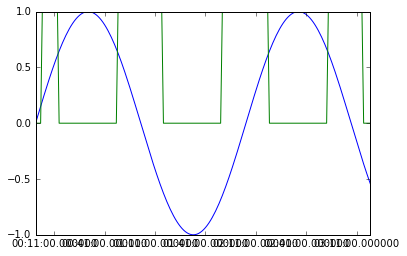

In [32]:
plt.plot(cml.channel_1.rx)
plt.plot(ts_wet)

# Timing for pandas operation *in_place* vs. *copy* 

In [7]:
import pandas as pd
import numpy as np

In [8]:
def update_inplace(df, key, factor):
    df[key] = df['test1'] * factor
    return df

def update_and_return_copy(df, key, factor):
    df_new = df.copy(deep=True)
    df_new[key] = df_new['test1'] * factor
    return df_new

In [9]:
df = pd.DataFrame(data={'test1': np.random.rand(1000000)})

In [10]:
df_updated_inplace = update_inplace(df, 'in_place', 5)

In [11]:
df_updated_inplace.head()

,test1,in_place
0,0.462386,2.311929
1,0.312162,1.560808
2,0.105920,0.529602
3,0.729099,3.645497
4,0.741368,3.706840


In [12]:
df['test1'].ix[0] = -99999

In [13]:
df_updated_inplace.head()

,test1,in_place
0,-99999.000000,2.311929
1,0.312162,1.560808
2,0.105920,0.529602
3,0.729099,3.645497
4,0.741368,3.706840


In [14]:
df = pd.DataFrame(data={'test1': np.random.rand(10000000)})

In [15]:
df_updated_copy = update_and_return_copy(df, 'copied', 3)

In [16]:
df_updated_copy.head()

,test1,copied
0,0.811737,2.435210
1,0.473870,1.421610
2,0.025125,0.075375
3,0.991302,2.973907
4,0.057723,0.173168


In [17]:
df['test1'].ix[0] = -99999

In [18]:
df_updated_copy.head()

,test1,copied
0,0.811737,2.435210
1,0.473870,1.421610
2,0.025125,0.075375
3,0.991302,2.973907
4,0.057723,0.173168


In [19]:
%%timeit
df_updated_inplace = update_inplace(df, 'in_place', 5)

10 loops, best of 3: 70.7 ms per loop


In [20]:
%%timeit
df_updated_copy = update_and_return_copy(df, 'copied', 3)

1 loop, best of 3: 129 ms per loop


# Test for updating a dict in a list of dicts 

In [19]:
list_of_dicts = [{'foo': 111, 'bar': 1},
                 {'foo': 222, 'bar': 2}]

for d in list_of_dicts:
    if d['bar'] == 1:
        d['foo'] = 999
list_of_dicts

[{'bar': 1, 'foo': 999}, {'bar': 2, 'foo': 222}]

In [20]:
list_of_dicts = [{'foo': 111, 'bar': 1},
                 {'foo': 222, 'bar': 2}]

for d in list_of_dicts:
    if d['bar'] == 1:
        d = {'hans': 'dampf'}
list_of_dicts

[{'bar': 1, 'foo': 111}, {'bar': 2, 'foo': 222}]